<a href="https://colab.research.google.com/github/bhandariarun/Covid_affected_country/blob/main/Copy_of_Covid_Country_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [6]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [7]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The function below is a function that takes country's name as input and returns two values:
1. An array of dates from input data
2. An array of that country's cases corresponding to the dates array

In [8]:
import matplotlib.pyplot as plt
def time_series_country(country_name, df):
  try:
    case_country = df.loc[df['Country/Region'] == country_name]
    case_country = case_country.drop(['Province/State','Lat','Long','Country/Region'], axis = 1)
    custom_dates = case_country.columns
    country_cases = case_country.to_numpy()
    country_cases = country_cases.T
    country_array_cases = country_cases.squeeze()
    plt.plot(custom_dates, country_array_cases)
    return custom_dates, country_array_cases
  except:
    print("country name error")

# date, cases = time_series_country('Nepal')


Here, The dates are in date/time format. The dates are regular(the count has gone everyday). So, creating a list of natural number in correspondance to the date.

Lower bound and upper bound to take the data for training
The data above upper bound is supposedly for testing

Upper bound - Lower bound = Your training size

Total - Upper bound = Your test size

Ignore date_train, date_test:  those are only for plotting and are because of a bad code.

In [9]:
def create_datasets(date, cases, lower_bound, upper_bound):
  date_index = np.arange(cases.shape[0])
  date_index = date_index.reshape(cases.shape[0],1)
  #x_train, x_test, y_train, y_test = train_test_split(date_index, cases, test_size = 0.1, random_state = 0)
  lower_bound = 185
  upper_bound = 190
  x_train = date_index[lower_bound:upper_bound]
  date_train = date[lower_bound:upper_bound]
  y_train = cases[lower_bound:upper_bound]
  x_test = date_index[upper_bound-1:]
  date_test = date[upper_bound-1:]
  y_test = cases[upper_bound-1:]
  return x_train, x_test, y_train, y_test, date_train, date_test




(5, 1) (954, 1)
(5,) (954,)


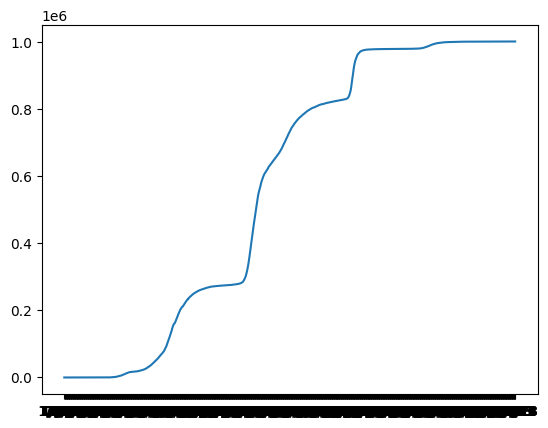

In [10]:
date, cases = time_series_country('Nepal', df_confirmed)
x_train, x_test, y_train, y_test, date_train, date_test = create_datasets(date, cases, 185, 190)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

Probably normalization of data should have been done for better results.

In [11]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(x_train,y_train)

In [12]:
from sklearn.linear_model import LinearRegression
def fit_linear(x_train, y_train):
  model = LinearRegression()
  model.fit(x_train, y_train)
  return model

In [13]:
preds = fit_linear(x_train, y_train).predict(x_test)
preds.dtype

dtype('float64')

In [14]:
preds = np.around(preds)
print(preds)

[ 19243.  19446.  19649.  19852.  20055.  20258.  20461.  20664.  20867.
  21070.  21273.  21476.  21679.  21882.  22085.  22288.  22491.  22694.
  22897.  23100.  23303.  23506.  23709.  23912.  24115.  24318.  24521.
  24724.  24927.  25130.  25333.  25536.  25739.  25942.  26145.  26348.
  26551.  26754.  26957.  27160.  27363.  27566.  27769.  27972.  28175.
  28378.  28581.  28784.  28987.  29190.  29393.  29596.  29799.  30002.
  30205.  30408.  30611.  30814.  31017.  31220.  31423.  31626.  31829.
  32032.  32235.  32438.  32641.  32844.  33047.  33250.  33453.  33656.
  33859.  34062.  34265.  34468.  34671.  34874.  35077.  35280.  35483.
  35686.  35889.  36092.  36295.  36498.  36701.  36904.  37107.  37310.
  37513.  37716.  37919.  38122.  38325.  38528.  38731.  38934.  39137.
  39340.  39543.  39746.  39949.  40152.  40355.  40558.  40761.  40964.
  41167.  41370.  41573.  41776.  41979.  42182.  42385.  42588.  42791.
  42994.  43197.  43400.  43603.  43806.  44009.  4

In [15]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

638261.6992041868

In [16]:
dframe = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': preds.flatten()})

In [17]:
dframe

,Actual,Predicted
0,19273,19243.0
1,19547,19446.0
2,19771,19649.0
3,20086,19852.0
4,20332,20055.0
...,...,...
949,1001149,211890.0
950,1001149,212093.0
951,1001149,212296.0
952,1001150,212499.0


Text(0.5, 1.0, "Linear regression on the Country's Covid Data")

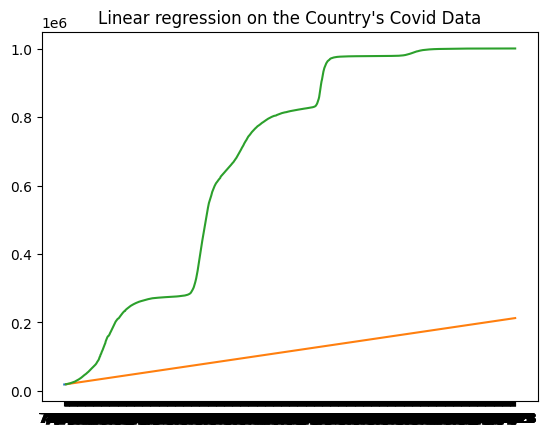

In [18]:
plt.plot(date_train, y_train)
plt.plot(date_test, preds)
plt.plot(date_test, y_test)
plt.title("Linear regression on the Country's Covid Data")

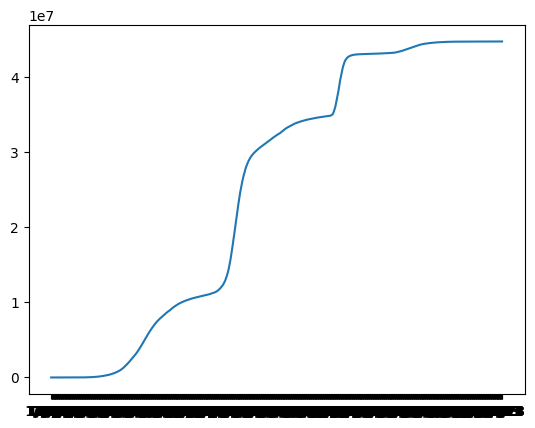

In [19]:
date, cases = time_series_country('India', df_confirmed)
x_train, x_test, y_train, y_test, date_train, date_test = create_datasets(date, cases, 185, 190)
preds = fit_linear(x_train, y_train).predict(x_test)



In [20]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

7581874.592424089

In [21]:
dframe = pd.DataFrame({'Actual': y_test.flatten(),'Predicted': preds.flatten()})
dframe

,Actual,Predicted
0,1581963,1580733.0
1,1634746,1629603.9
2,1695988,1678474.8
3,1750723,1727345.7
4,1803695,1776216.6
...,...,...
949,44689327,47959217.1
950,44689593,48008088.0
951,44689919,48056958.9
952,44690298,48105829.8


Text(0.5, 1.0, "Linear regression on the Country's Covid Data")

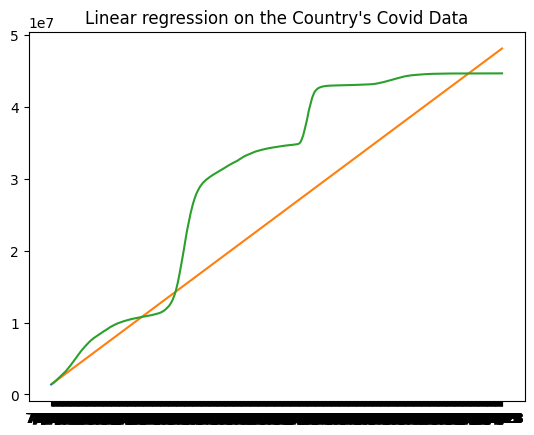

In [22]:
plt.plot(date_train, y_train)
plt.plot(date_test, preds)
plt.plot(date_test, y_test)
plt.title("Linear regression on the Country's Covid Data")